In [1]:
#import modules
import math
from random import randint
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#set variables for experiment 
a=[]
b=[]
d=25
streamsize=1000000
streammax=1000
epsilon=0.0001 
stream=defaultdict(float)
cm_min=defaultdict(float)
w=math.ceil(math.e/epsilon)
cm=np.array([[0]*w for _ in range(d)])  # table with d rows and w columns
primes=[10009,10037,10039,10061,10067,10069,10079,10091,10093,10099,10103,10111,10133,10139,10141] 
p=primes[randint(0,(len(primes)-1))] #fix prime p
for _ in range(d):
    a.append(randint(1, p-1))
    b.append(randint(0, p))
print ("w:",w)
print ("d:",d)
print ("p:",p)
print ("a values for hash functions:",a)
print ("b values for hash functions:",b)

w: 27183
d: 25
p: 10037
a values for hash functions: [5818, 9108, 5098, 9345, 5493, 409, 2654, 1625, 4313, 5314, 9123, 972, 9437, 5554, 1599, 1876, 6402, 2934, 6217, 6463, 2537, 94, 5296, 2059, 8791]
b values for hash functions: [5812, 5306, 1964, 9295, 1096, 2244, 2107, 1890, 2589, 5703, 5885, 8213, 6508, 1755, 4312, 5290, 3056, 2551, 7121, 9241, 8006, 9416, 9437, 4436, 1118]


In [3]:
#iterate over the stream
for _ in range(streamsize):
    i=(randint(1, streammax))
    stream[i]+=1 #Add 1 to true frequency of item
    for x in range(d): #for each hash function
        bucket=(a[x]*i + b[x]) % p % w
        cm[x][bucket]+=1 #update table

In [4]:
#retrieve counts from count min data structure
for item,freq in stream.items():
    counts=[]
    for x in range(d): #for each hash function
        bucket=(a[x]*item + b[x]) % p % w
        counts.append(cm[x][bucket]) 
    cm_min[item]=min(counts) #select minimum from returned table values

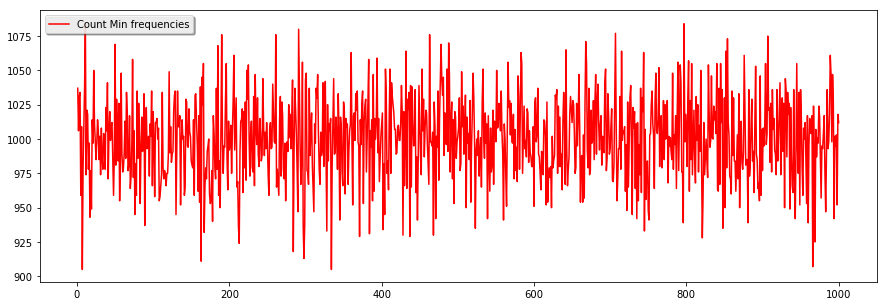

In [5]:
plt.figure(figsize=(15,5))
plt.plot(list(cm_min.keys()), list(cm_min.values()),'r',label='Count Min frequencies')
legend = plt.legend(loc='upper left', shadow=True)
plt.show()


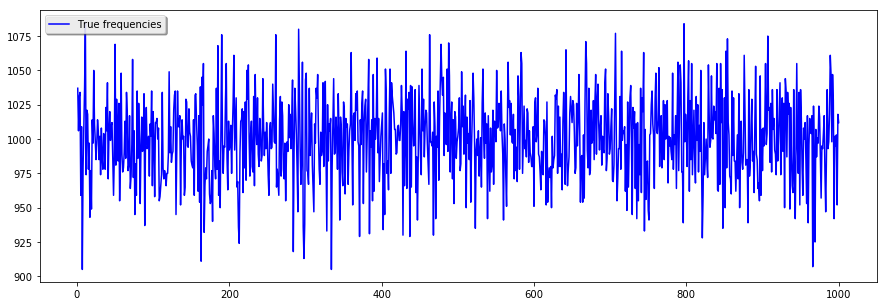

In [6]:
plt.figure(figsize=(15,5))
plt.plot(list(stream.keys()), list(stream.values()),'b',label='True frequencies')
legend = plt.legend(loc='upper left', shadow=True)
plt.show()